In [1]:
import pickle
from pprint import pprint
import pandas as pd

In [11]:
# 데이터 불러오기
with open("./cleaned_data.pk", "rb") as f:
    data = pickle.load(f)

# 데이터 수정
data.reset_index(inplace=True, drop=True)

# 데이터 확인
print(data.info())
print(data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     2223 non-null   object
 1   User     2223 non-null   object
 2   Message  2223 non-null   object
dtypes: object(3)
memory usage: 52.2+ KB
None
                     Date          User                   Message
2218  2021-03-30 10:19:34    Rt회계학과 양윤철  내친구 댕기는 회사는 전액 회사 부담이라서 
2219  2021-03-30 10:19:41  Rt글로벌비즈니스최성진                         굿
2220  2021-03-30 10:19:42  Rt글로벌비즈니스최성진                       복지굿
2221  2021-03-30 10:19:54  Rt글로벌비즈니스최성진                  너가 건의해봐 
2222  2021-03-30 10:20:29  Rt글로벌비즈니스최성진                   장우용 핼맷컷


In [12]:
### Data column을 Pandas Datetime으로 변환
data["Date"] = pd.to_datetime(data["Date"])
# Date Column을 index로 설정
data = data.set_index("Date")
data.tail()

,User,Message
Date,,
2021-03-30 10:19:34,Rt회계학과 양윤철,내친구 댕기는 회사는 전액 회사 부담이라서
2021-03-30 10:19:41,Rt글로벌비즈니스최성진,굿
2021-03-30 10:19:42,Rt글로벌비즈니스최성진,복지굿
2021-03-30 10:19:54,Rt글로벌비즈니스최성진,너가 건의해봐
2021-03-30 10:20:29,Rt글로벌비즈니스최성진,장우용 핼맷컷


In [13]:
# 월 별로 나누기
month02 = data["2021-02-01" : "2021-02-28"]
month03 = data["2021-03-01" : "2021-03-30"]

In [14]:
print(month02.tail())
print(month03.tail())

                          User        Message
Date                                         
2021-02-28 17:08:41  Rt건축공학조수영       사업하고싶은사람
2021-02-28 17:08:53  Rt건축공학조수영  50기 선배가 물어보더라
2021-02-28 17:08:56  Rt건축공학조수영       아마 카페일텐데
2021-02-28 17:17:48    Rt법학차진영          오 조수영
2021-02-28 17:17:52    Rt법학차진영      활발하게 활동하네
                             User                   Message
Date                                                       
2021-03-30 10:19:34    Rt회계학과 양윤철  내친구 댕기는 회사는 전액 회사 부담이라서 
2021-03-30 10:19:41  Rt글로벌비즈니스최성진                         굿
2021-03-30 10:19:42  Rt글로벌비즈니스최성진                       복지굿
2021-03-30 10:19:54  Rt글로벌비즈니스최성진                  너가 건의해봐 
2021-03-30 10:20:29  Rt글로벌비즈니스최성진                   장우용 핼맷컷


In [15]:
# 각 시간대별로 카카오톡 대화내용 가져오기
slice0 = [msg for msg in list(month02["Message"])]
slice1 = [msg for msg in list(month03["Message"])]

In [18]:
print(slice0[:3])
print(slice1[:3])

['일어나자', '대답들좀', '해라']
['차진영생일이네', '아님', '거짓말임']


In [22]:
import nltk

total_tokens = [token for doc in slice0 for token in doc.split()]
print(len(total_tokens))

929


In [23]:
text = nltk.Text(total_tokens, name='kakao')
print(len(set(text.tokens)))
print(text.vocab().most_common(10))

763
[('지사부회장', 11), ('●', 11), ('◑', 11), ('56기', 8), ('사진', 6), ('○', 6), ('아파트', 6), ('부동산', 6), ('삭제된', 4), ('메시지입니다', 4)]


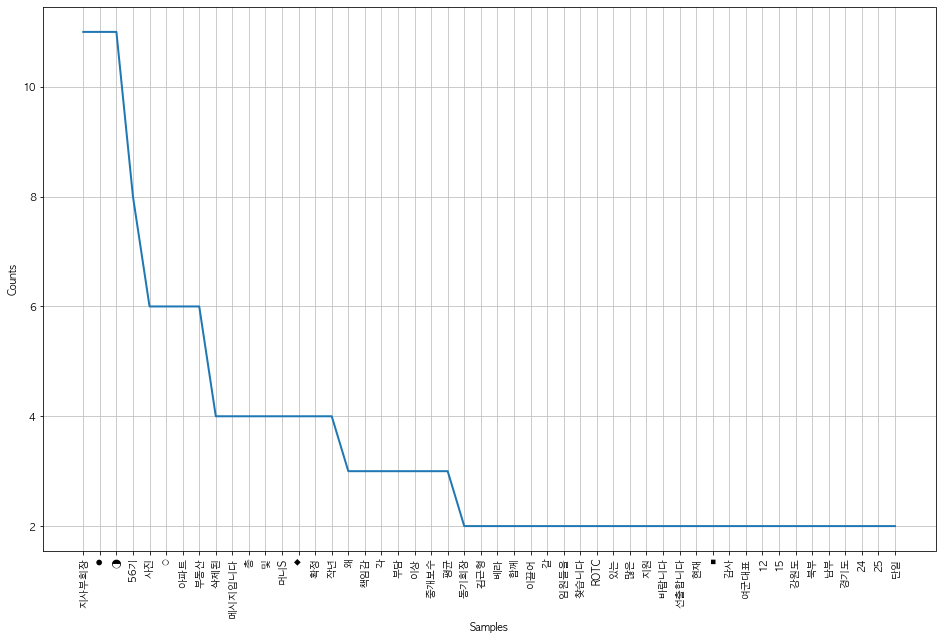

In [24]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == "Darwin":
    rc('font', family="AppleGothic")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
plt.figure(figsize=(16, 10))
text.plot(50)

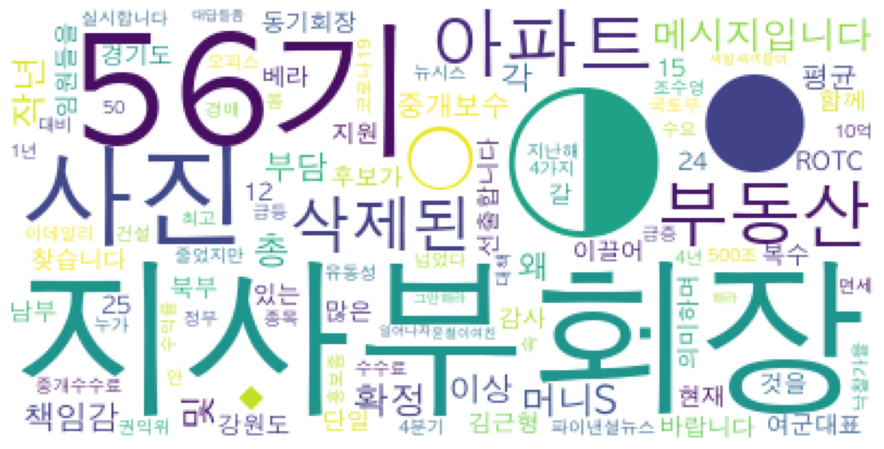

In [27]:
from wordcloud import WordCloud

wc = text.vocab().most_common(100)

wordcloud = WordCloud(font_path ='/Library/Fonts/AppleGothic.ttf',
                     relative_scaling = 0.5,
                     background_color='white'
                     ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [30]:
def time_freq_analysis(time_slice):
    
    total_tokens = [token for doc in time_slice for token in doc.split()]
    text = nltk.Text(total_tokens, name="kakao")
    
    path = "c:/Windows/Fonts/malgun.ttf"
    if platform.system() == "Darwin":
        rc('font', family="AppleGothic")
    elif platform.system() == "Windows":
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print('Unknown system... sorry~~~~')
    
    plt.figure(figsize=(16, 10))
    text.plot(50)
    
    wc = text.vocab().most_common(100)
    
    wordcloud = WordCloud(font_path ='/Library/Fonts/AppleGothic.ttf',
                     relative_scaling = 0.2,
                     background_color='white'
                     ).generate_from_frequencies(dict(wc))
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

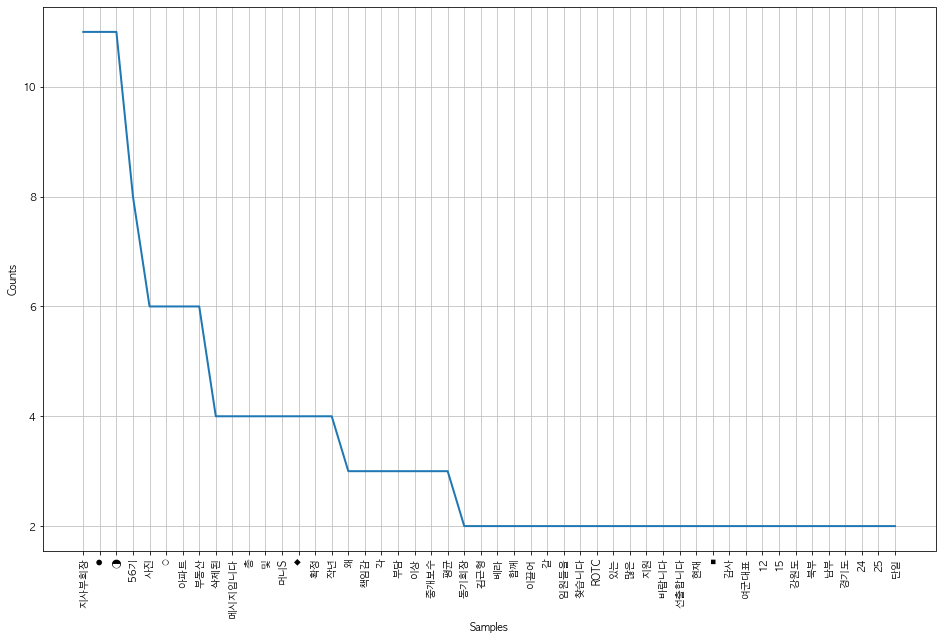

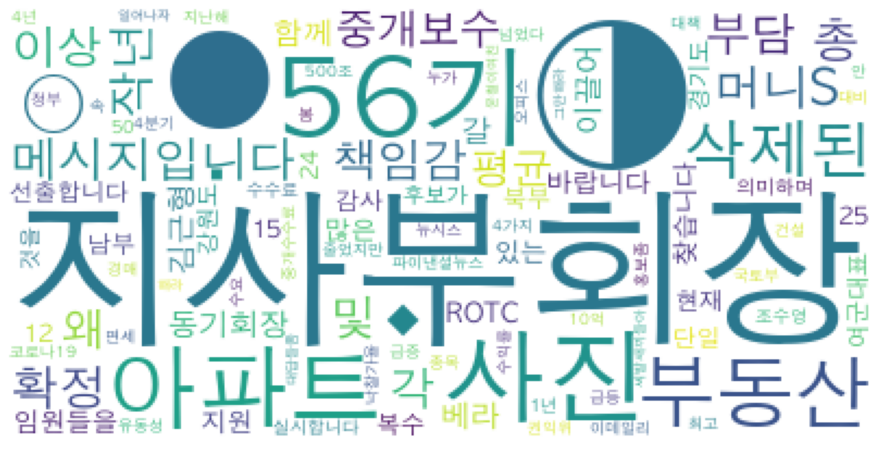

In [31]:
time_freq_analysis(slice0)